# Tensorflow Example 02 -- Lecture 06
This file goes through and shows some of the example properties that we talked about in the math.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# Import data
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Helper functions for creating weight variables
def weight_variable(shape):
    """weight_variable generates a weight variable of a given shape."""
    initial = tf.zeros(shape)
    return tf.Variable(initial)

def bias_variable(shape):
    """bias_variable generates a bias variable of a given shape."""
    initial = tf.constant(0.0, shape=shape)
    return tf.Variable(initial)

### Models
We're going to start with logistic regression, so this is the multi-class logistic regression that we showed in the last coding example.

In [3]:
# Model Inputs
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Define the graph
W_fc1 = weight_variable([784, 10])
b_fc1 = bias_variable([10])
y_logits = (tf.matmul(x, W_fc1) + b_fc1)

# Loss 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_logits))

# Evaluation
correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



### Optimizers

Instead of the optimizer being given though, let's try out a few. Here we have optimizers implementing algorithms for [Stochastic Gradient Descent](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer) (SGD), [Stochastic Gradient Descent with Momentum](https://www.tensorflow.org/api_docs/python/tf/train/MomentumOptimizer) (momentum), and [Adaptive Moments](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer) (ADAM).

#### First, let's first try out different stochastic gradient descent constant step sizes

In [14]:
train_step_SGD_large = tf.train.GradientDescentOptimizer(learning_rate=1.0).minimize(cross_entropy)
train_step_SGD_medium = tf.train.GradientDescentOptimizer(learning_rate=.1).minimize(cross_entropy)
train_step_SGD_small = tf.train.GradientDescentOptimizer(learning_rate=.025).minimize(cross_entropy)
train_step_SGD_tiny = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(cross_entropy)

### Training

Because we'll be repeating training a few times, let's move our training regimen into function. Note that we pass which optimization algorithm we're running as an argument. In addition to printing out the validation accuracy and final test accuracy, we'll also return the lists of accuracies at each validation step and the training losses at each iteration.

In [15]:
def train_MLP(train_step_optimizer, iterations=4000):
    with tf.Session() as sess:
        # Initialize (or reset) all variables
        sess.run([tf.global_variables_initializer(),tf.local_variables_initializer()])
        
        # Initialize arrays to track losses and validation accuracies
        valid_accs = [] 
        losses = []
        
        for i in range(iterations):
            # Validate every 250th batch
            if i % 250 == 0:
                validation_accuracy = 0
                for v in range(10):
                    batch = mnist.validation.next_batch(50)
                    validation_accuracy += (1/10) * accuracy.eval(feed_dict={x: batch[0], y_: batch[1]})
                print('step %d, validation accuracy %g' % (i, validation_accuracy))
                valid_accs.append(validation_accuracy)
                
            # Train    
            batch = mnist.train.next_batch(20)
            loss, _ = sess.run([cross_entropy, train_step_optimizer], feed_dict={x: batch[0], y_: batch[1]})
            losses.append(loss)
            
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
        
    return valid_accs, losses

Finally, let's train the MLP using all three optimizers and compare the results:

In [16]:
print("SGD-large:")
valid_accs_SGD_large, losses_SGD_large = train_MLP(train_step_SGD_large,5000)
print("SGD-medium:")
valid_accs_SGD_medium, losses_SGD_medium = train_MLP(train_step_SGD_medium,5000)
print("SGD-small:")
valid_accs_SGD_small, losses_SGD_small = train_MLP(train_step_SGD_small,5000)
print("SGD-tiny:")
valid_accs_SGD_tiny, losses_SGD_tiny = train_MLP(train_step_SGD_tiny,5000)

SGD-large:
step 0, validation accuracy 0.096
step 250, validation accuracy 0.888
step 500, validation accuracy 0.884
step 750, validation accuracy 0.894
step 1000, validation accuracy 0.902
step 1250, validation accuracy 0.858
step 1500, validation accuracy 0.9
step 1750, validation accuracy 0.92
step 2000, validation accuracy 0.892
step 2250, validation accuracy 0.882
step 2500, validation accuracy 0.892
step 2750, validation accuracy 0.872
step 3000, validation accuracy 0.89
step 3250, validation accuracy 0.918
step 3500, validation accuracy 0.884
step 3750, validation accuracy 0.89
step 4000, validation accuracy 0.922
step 4250, validation accuracy 0.902
step 4500, validation accuracy 0.878
step 4750, validation accuracy 0.924
test accuracy 0.8835
SGD-medium:
step 0, validation accuracy 0.112
step 250, validation accuracy 0.882
step 500, validation accuracy 0.89
step 750, validation accuracy 0.924
step 1000, validation accuracy 0.898
step 1250, validation accuracy 0.91
step 1500, va

### Visualization

Plotting things:

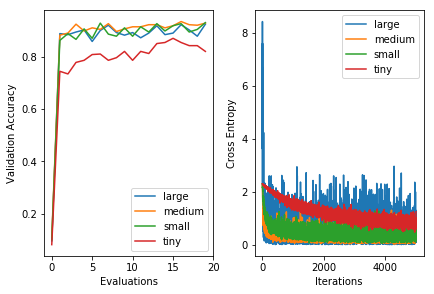

In [17]:
fig, ax = plt.subplots(1, 2)
fig.tight_layout()

ax[0].plot(valid_accs_SGD_large)
ax[0].plot(valid_accs_SGD_medium)
ax[0].plot(valid_accs_SGD_small)
ax[0].plot(valid_accs_SGD_tiny)

ax[0].set_ylabel('Validation Accuracy')
ax[0].set_xlabel('Evaluations')
ax[0].legend(['large', 'medium', 'small','tiny'], loc='lower right')

ax[1].plot(losses_SGD_large)
ax[1].plot(losses_SGD_medium)
ax[1].plot(losses_SGD_small)
ax[1].plot(losses_SGD_tiny)

ax[1].set_ylabel('Cross Entropy')
ax[1].set_xlabel('Iterations')
ax[1].legend(['large', 'medium', 'small','tiny'], loc='upper right')

In [8]:
# with smoothing for clarity
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

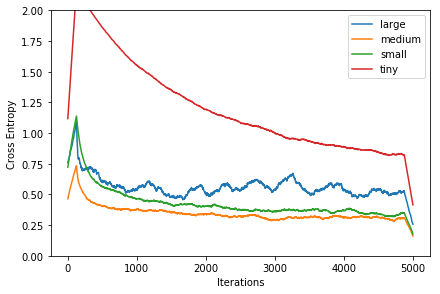

In [18]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
sm=250
ax.plot(smooth(losses_SGD_large,sm))
ax.plot(smooth(losses_SGD_medium,sm))
ax.plot(smooth(losses_SGD_small,sm))
ax.plot(smooth(losses_SGD_tiny,sm))
ax.set_ylim([0,2])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Iterations')
ax.legend(['large', 'medium', 'small','tiny'], loc='upper right')

### Stochastic Gradient Descent with Momentum
### ADAM Optimizer

In [10]:
# Medium was well performing before.  Let's use that again.
train_step_SGD_medium = tf.train.GradientDescentOptimizer(learning_rate=.1).minimize(cross_entropy)
# We can incoporate momentum by simply adding one line
train_step_momentum_medium = tf.train.MomentumOptimizer(learning_rate=.1,momentum=.5).minimize(cross_entropy)
train_step_momentum_small = tf.train.MomentumOptimizer(learning_rate=.01,momentum=.99).minimize(cross_entropy)
# We can also try ADAM
train_step_adam = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cross_entropy)

In [11]:
initialize_all= [tf.global_variables_initializer(),tf.local_variables_initializer()]
print("SGD-medium:")
valid_accs_SGD_medium, losses_SGD_medium = train_MLP(train_step_SGD_medium,5000)
print("momentum-medium:")
valid_accs_momentum_medium, losses_momentum_medium = train_MLP(train_step_momentum_medium,5000)
print("momentum-small:")
valid_accs_momentum_small, losses_momentum_small = train_MLP(train_step_momentum_small,5000)
print("ADAM:")
valid_accs_adam, losses_adam = train_MLP(train_step_adam,5000)

SGD-medium:
step 0, validation accuracy 0.096
step 250, validation accuracy 0.866
step 500, validation accuracy 0.896
step 750, validation accuracy 0.914
step 1000, validation accuracy 0.896
step 1250, validation accuracy 0.902
step 1500, validation accuracy 0.932
step 1750, validation accuracy 0.9
step 2000, validation accuracy 0.946
step 2250, validation accuracy 0.92
step 2500, validation accuracy 0.92
step 2750, validation accuracy 0.92
step 3000, validation accuracy 0.92
step 3250, validation accuracy 0.916
step 3500, validation accuracy 0.928
step 3750, validation accuracy 0.916
step 4000, validation accuracy 0.934
step 4250, validation accuracy 0.93
step 4500, validation accuracy 0.908
step 4750, validation accuracy 0.906
test accuracy 0.9199
momentum-medium:
step 0, validation accuracy 0.106
step 250, validation accuracy 0.894
step 500, validation accuracy 0.926
step 750, validation accuracy 0.928
step 1000, validation accuracy 0.914
step 1250, validation accuracy 0.896
step 15

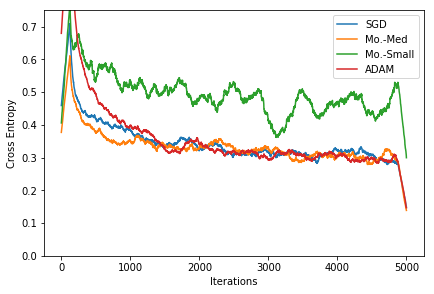

In [13]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
sm=250
ax.plot(smooth(losses_SGD_medium,sm),label='SGD')
ax.plot(smooth(losses_momentum_medium,sm),label='Mo.-Med')
ax.plot(smooth(losses_momentum_small,sm),label='Mo.-Small')
ax.plot(smooth(losses_adam,sm),label='ADAM')
ax.set_ylim([0,.75])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Iterations')
ax.legend(loc='upper right')

### More complex model

In [27]:
# Simple Convolutional Neural Network using high-level functions
# Will discuss next week.
tf.reset_default_graph()
# Model Inputs
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# Define the graph
y=tf.reshape(x,[-1,28,28,1])
y=tf.layers.conv2d(y,filters=32,kernel_size=[4,4])
y=tf.layers.max_pooling2d(y,pool_size=2,strides=1)
y=tf.layers.conv2d(y,filters=32,kernel_size=[4,4])
y=tf.layers.max_pooling2d(y,pool_size=2,strides=1)
y=tf.layers.flatten(y)
y=tf.layers.dense(y,units=100,activation=tf.nn.relu)
y_logits=tf.layers.dense(y,10,activation=None)
# Loss 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_logits))

# Evaluation
correct_prediction = tf.equal(tf.argmax(y_logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


In [35]:
# Medium was well performing before.  Let's use that again.
train_step_SGD_medium = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(cross_entropy)
# We can incoporate momentum by simply adding one line
train_step_momentum_medium = tf.train.MomentumOptimizer(learning_rate=.001,momentum=.5).minimize(cross_entropy)
train_step_momentum_small = tf.train.MomentumOptimizer(learning_rate=.0001,momentum=.99).minimize(cross_entropy)
# We can also try ADAM
train_step_adam = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cross_entropy)

In [36]:
initialize_all= [tf.global_variables_initializer(),tf.local_variables_initializer()]
print("SGD-medium:")
valid_accs_SGD_medium, losses_SGD_medium = train_MLP(train_step_SGD_medium,1000)
print("momentum-medium:")
valid_accs_momentum_medium, losses_momentum_medium = train_MLP(train_step_momentum_medium,1000)
print("momentum-small:")
valid_accs_momentum_small, losses_momentum_small = train_MLP(train_step_momentum_small,1000)
print("ADAM:")
valid_accs_adam, losses_adam = train_MLP(train_step_adam,1000)

SGD-medium:
step 0, validation accuracy 0.064
step 250, validation accuracy 0.75
step 500, validation accuracy 0.85
step 750, validation accuracy 0.87
test accuracy 0.8752
momentum-medium:
step 0, validation accuracy 0.086
step 250, validation accuracy 0.806
step 500, validation accuracy 0.89
step 750, validation accuracy 0.88
test accuracy 0.909
momentum-small:
step 0, validation accuracy 0.104
step 250, validation accuracy 0.83
step 500, validation accuracy 0.918
step 750, validation accuracy 0.916
test accuracy 0.9338
ADAM:
step 0, validation accuracy 0.116
step 250, validation accuracy 0.944
step 500, validation accuracy 0.962
step 750, validation accuracy 0.974
test accuracy 0.97


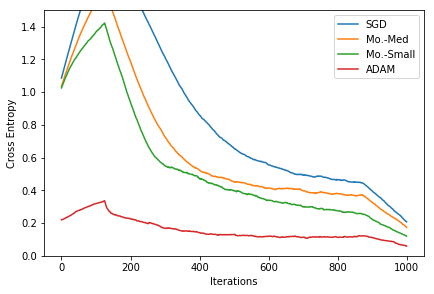

In [38]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout()
sm=250
ax.plot(smooth(losses_SGD_medium,sm),label='SGD')
ax.plot(smooth(losses_momentum_medium,sm),label='Mo.-Med')
ax.plot(smooth(losses_momentum_small,sm),label='Mo.-Small')
ax.plot(smooth(losses_adam,sm),label='ADAM')
ax.set_ylim([0,1.5])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Iterations')
ax.legend(loc='upper right')